In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import h5py
import json
from scipy.stats import linregress
from scipy.interpolate import interp1d
import os
import glob
import sys


sys.path.append('D:/OneDrive - NIST/Documents/GitHub/Refltools')
import LARIAT

# Load Data

In [2]:
A3S29_C1= LARIAT.LariatDataProcessor('DS_A3-S29_C_150V1s2024-10-03_16-56-01.hdf5')
A3S29_C2= LARIAT.LariatDataProcessor('DS_A3-S29_C_150V1s2024-10-03_19-31-02.hdf5')
A3S29_C3= LARIAT.LariatDataProcessor('DS_A3-S29_C_150V1s2024-10-04_02-05-37.hdf5')
A3S29_N1= LARIAT.LariatDataProcessor('DS_A3-S29_N_150V1s2024-10-04_00-37-51.hdf5')
A3S29_N2= LARIAT.LariatDataProcessor('DS_A3-S29_N_150V1s2024-10-04_07-10-54.hdf5')
A3S29_O1= LARIAT.LariatDataProcessor('DS_A3-S29_O_150V1s2024-10-03_22-01-18.hdf5')
A3S29_O2= LARIAT.LariatDataProcessor('DS_A3-S29_O_150V1s2024-10-04_04-34-11.hdf5')
A3S29_F1= LARIAT.LariatDataProcessor('DS_A3-S29_F_150V1s2024-10-03_23-28-54.hdf5')
A3S29_F2= LARIAT.LariatDataProcessor('DS_A3-S29_F_150V1s2024-10-04_06-01-43.hdf5')

# Normalize by Izero

In [3]:
A3S29_C1.normalize_by_izero()
A3S29_C2.normalize_by_izero()
A3S29_C3.normalize_by_izero()

A3S29_N2.normalize_by_izero()
A3S29_N1.normalize_by_izero()
A3S29_O1.normalize_by_izero()
A3S29_O2.normalize_by_izero()
A3S29_F1.normalize_by_izero()
A3S29_F2.normalize_by_izero()

Energies shape: (550,)
I0 raw shape: (551,)
Using length: 550
Energies shape: (550,)
I0 raw shape: (551,)
Using length: 550
Energies shape: (550,)
I0 raw shape: (551,)
Using length: 550
Energies shape: (250,)
I0 raw shape: (251,)
Using length: 250
Energies shape: (250,)
I0 raw shape: (251,)
Using length: 250
Energies shape: (300,)
I0 raw shape: (301,)
Using length: 300
Energies shape: (300,)
I0 raw shape: (301,)
Using length: 300
Energies shape: (200,)
I0 raw shape: (201,)
Using length: 200
Energies shape: (200,)
I0 raw shape: (201,)
Using length: 200


# plot individual images

(<Figure size 576x432 with 2 Axes>,
 <AxesSubplot: title={'center': 'Energy = 285.00'}, xlabel='pix_y', ylabel='pix_x'>)

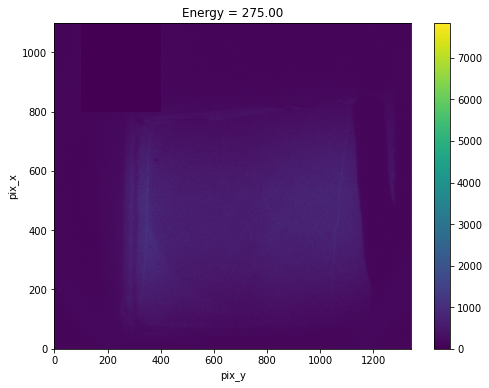

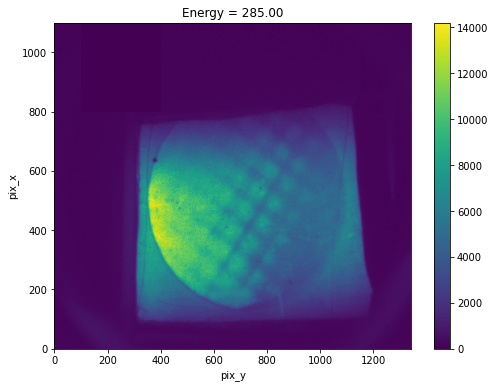

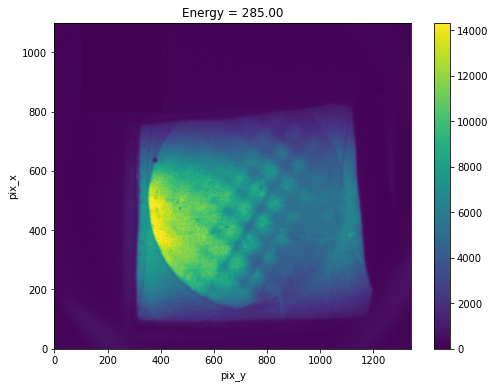

In [4]:
A3S29_C1.plot_energy_slice(272)
A3S29_C2.plot_energy_slice(285)
A3S29_C3.plot_energy_slice(285)

(<Figure size 576x432 with 2 Axes>,
 <AxesSubplot: title={'center': 'Energy = 400.00'}, xlabel='pix_y', ylabel='pix_x'>)

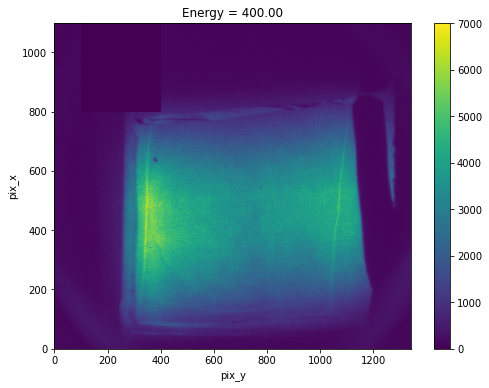

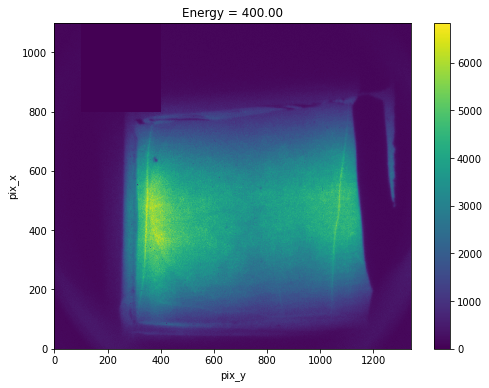

In [5]:
A3S29_N1.plot_energy_slice(400)
A3S29_N2.plot_energy_slice(400)

(<Figure size 576x432 with 2 Axes>,
 <AxesSubplot: title={'center': 'Energy = 530.00'}, xlabel='pix_y', ylabel='pix_x'>)

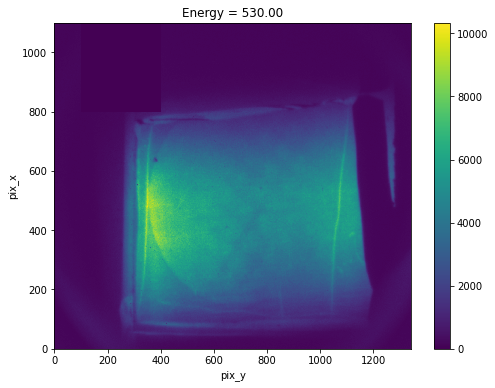

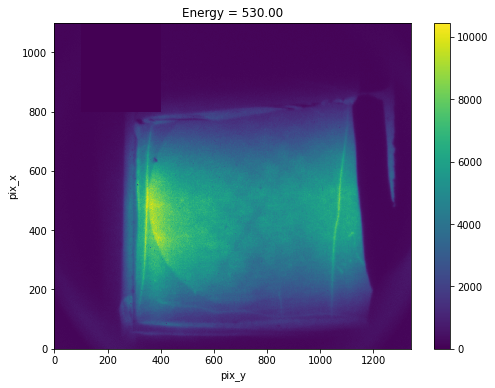

In [6]:
A3S29_O1.plot_energy_slice(530)
A3S29_O2.plot_energy_slice(530)

(<Figure size 576x432 with 2 Axes>,
 <AxesSubplot: title={'center': 'Energy = 700.00'}, xlabel='pix_y', ylabel='pix_x'>)

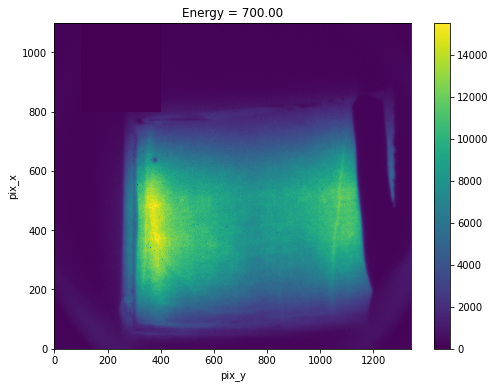

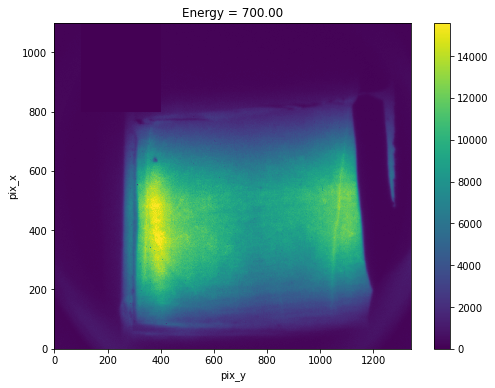

In [7]:
A3S29_F1.plot_energy_slice(700)
A3S29_F2.plot_energy_slice(700)

# Carbon Edge

Generating sensitivity calibration from energy 276.00 eV
(Requested: 276.00 eV)
Excluding 90025 pixels below threshold 63.870
Normalizing by minimum pixel value: 64.000
Calibration statistics:
  Valid pixels: 1,388,375 / 1,478,400
  Mean correction factor: 4.226
  Correction range: 1.000 - 99.797
  Standard deviation: 2.883


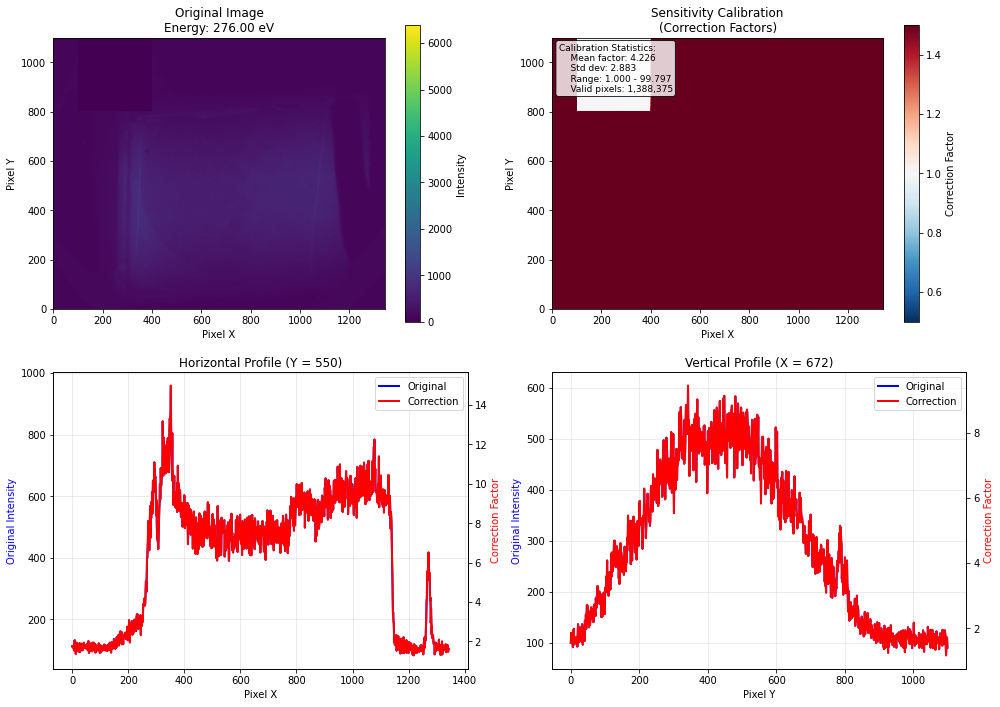

Calibration saved to ./calibrations/A3S29_C1_flatfield_276eV.npz
Calibration info saved to ./calibrations/A3S29_C1_flatfield_276eV_info.txt


In [5]:
cal_image_carbon, cal_info_Carbon = A3S29_C1.generate_sensitivity_calibration(
    calibration_energy=276,
    normalization_method='min_pixel',
    plot=True,
    save_calibration=True,
    save_path='./calibrations/',
    calibration_name='A3S29_C1_flatfield_276eV'
)

In [6]:
A3S29_C1.apply_sensitivity_calibration(calibration_image=cal_image_carbon)

Using provided calibration image
Applying sensitivity calibration to 550 energy slices...
Applied calibration by division (removing sensitivity variations)
Sensitivity calibration applied successfully


{'source': 'provided_array', 'method': 'divide'}

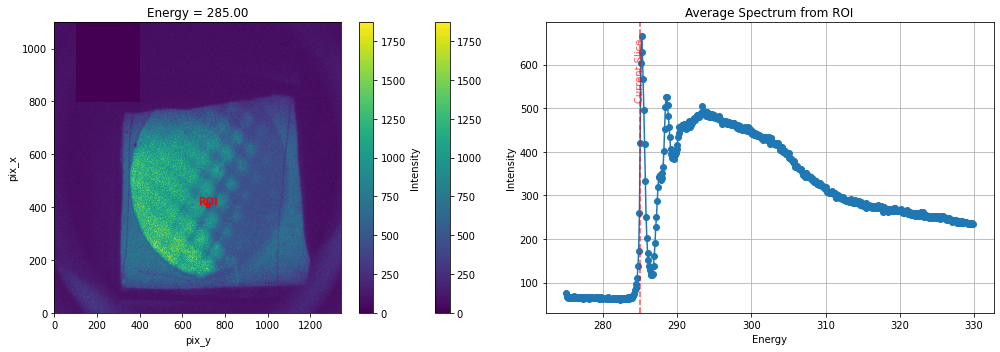

In [19]:
roi = (715, 400, 10, 10)  # (x_min, y_min, width, height)
spectrum_Carbon_xr, spectrum_Carbon_np = A3S29_C1.extract_roi_spectrum(roi, plot=True, energy_slice=285.0)

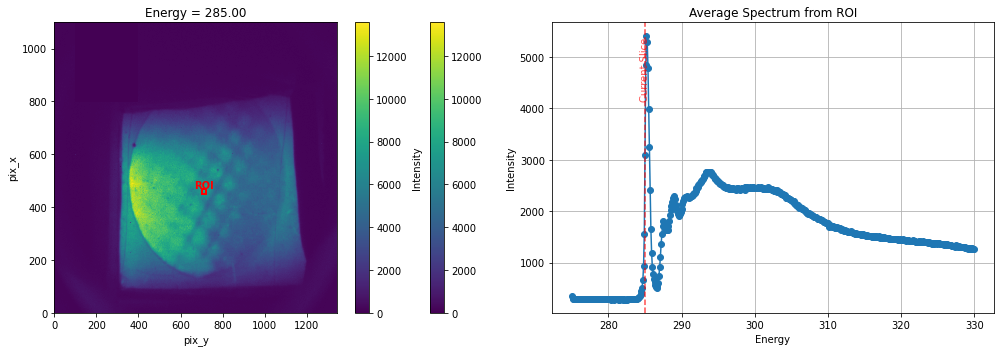

In [13]:
roi = (700, 450, 20, 20)  # (x_min, y_min, width, height)
spectrum_Carbon_xr, spectrum_Carbon_np = A3S29_C1.extract_roi_spectrum(roi, plot=True, energy_slice=285.0)

In [ ]:
roi = (500, 200, 400, 400)  # (x_min, y_min, width, height)
spectrum_Carbon_xr, spectrum_Carbon_np = A2S24_C1.extract_roi_spectrum(roi, plot=True, energy_slice=285.0)

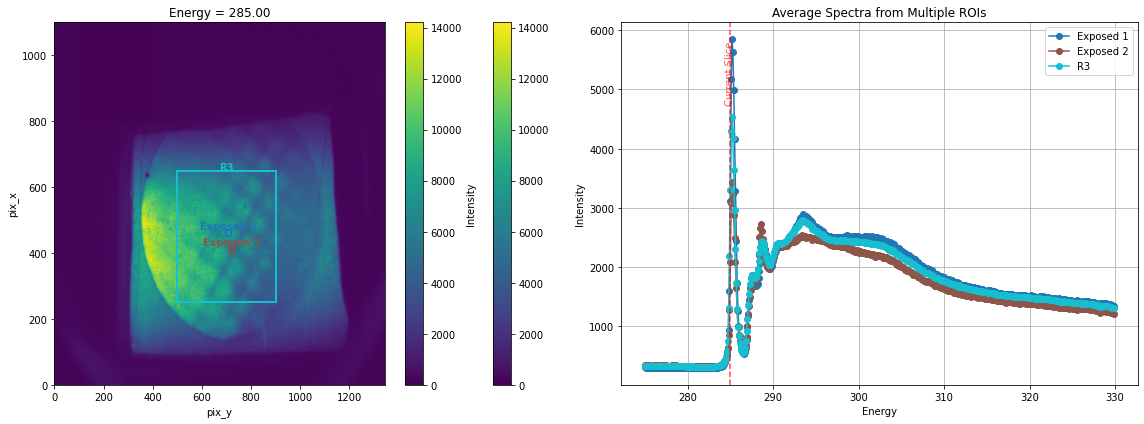

In [20]:
# Multiple ROI comparison
roi_list = [(700, 450, 20, 20)  , (710, 400, 20, 20) ,(500, 250, 400, 400)]
roi_labels = ['Exposed 1', 'Exposed 2', 'R3']

# Extract and compare multiple ROI spectra
spectra_carbon_dict = A3S29_C2.extract_multiple_roi_spectra(roi_list, roi_labels, plot=True, energy_slice=285.0)

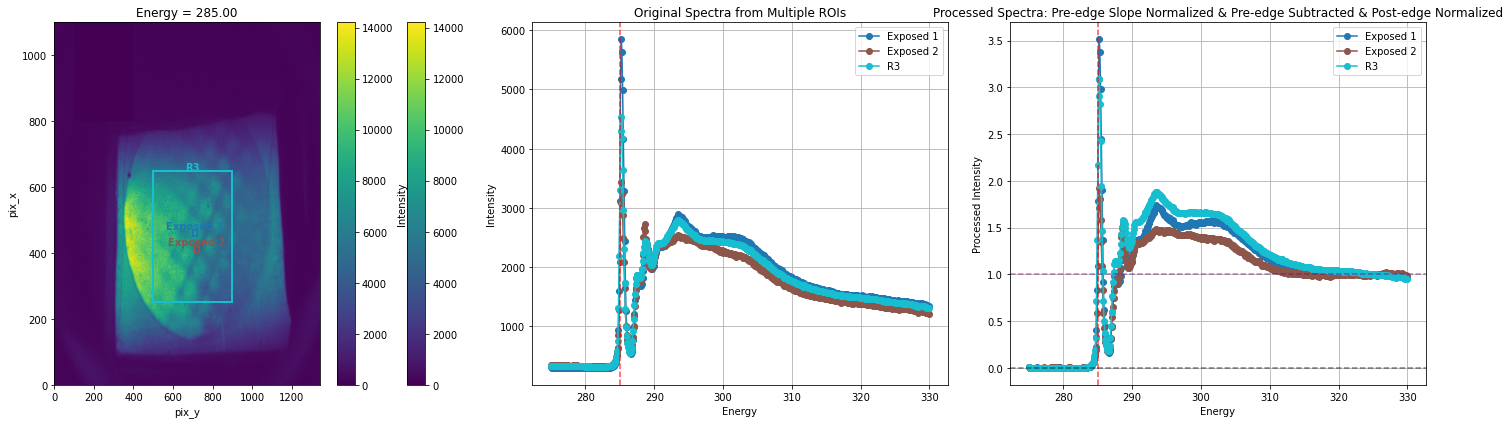

Data saved to A3S29_carbon in CSV format


In [22]:
spectra_carbon_dict = A3S29_C2.extract_and_process_multiple_spectra(roi_list, roi_labels, plot=True, 
    pre_edge_norm_range=(280, 283), pre_edge_sub_range=(275, 283),
    post_edge_range=(320, 330),energy_slice=285.0,save_data=True, save_path='A3S29_carbon')

In [ ]:
comparison_animation = A3S29_C2.create_roi_comparison_animation(
    roi_list=roi_list,
    roi_labels=roi_labels,
    output_filename='A3S29_C2_MultipleROI.gif',
    total_time=8.0,                  # Longer animation for multiple ROI         # Focus on absorption edge
    normalize_spectra=False,           # Normalize for easier comparison
    dpi=120,
    contrast_percentiles=(1, 99)      # High contrast for better visibility
)

# Oxygen Edge

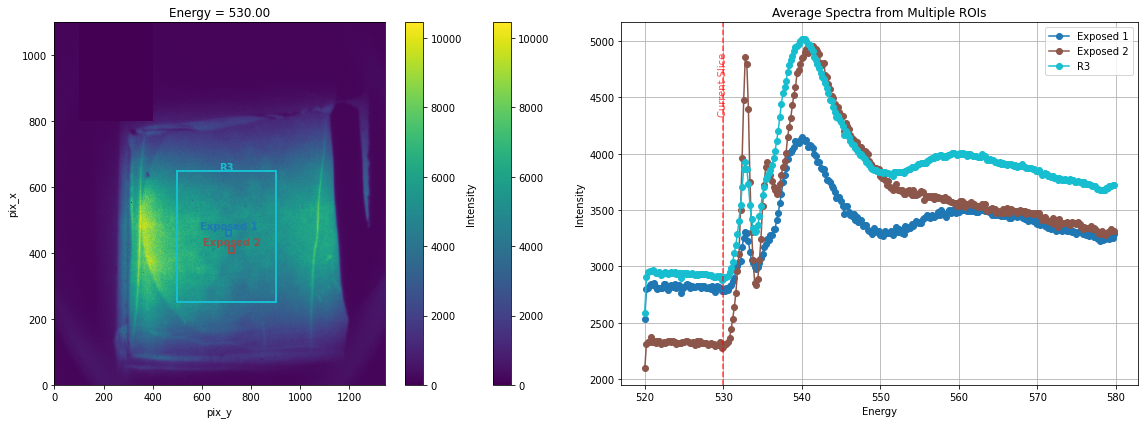

In [23]:
# Extract and compare multiple ROI spectra
spectra_carbon_dict = A3S29_O2.extract_multiple_roi_spectra(roi_list, roi_labels, plot=True, energy_slice=530)

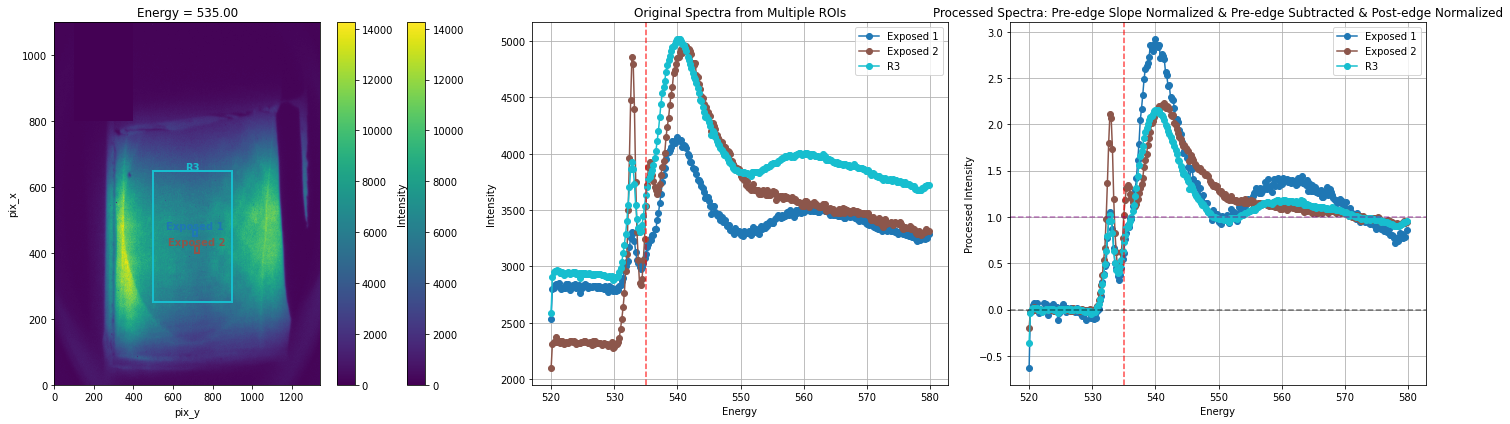

Data saved to A3S29_oxygen in CSV format


In [24]:
spectra_carbon_dict = A3S29_O2.extract_and_process_multiple_spectra(roi_list, roi_labels, plot=True, 
    pre_edge_norm_range=(523, 528), pre_edge_sub_range=(523, 528),
    post_edge_range=(570,575),energy_slice=535,save_data=True, save_path='A3S29_oxygen')

# Fluorine Edge

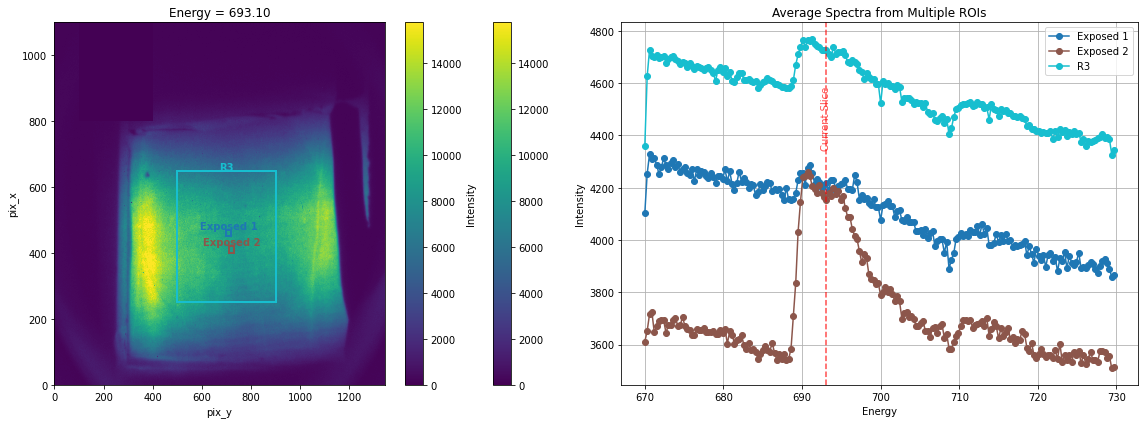

In [25]:

# Extract and compare multiple ROI spectra
spectra_carbon_dict = A3S29_F2.extract_multiple_roi_spectra(roi_list, roi_labels, plot=True, energy_slice=693)

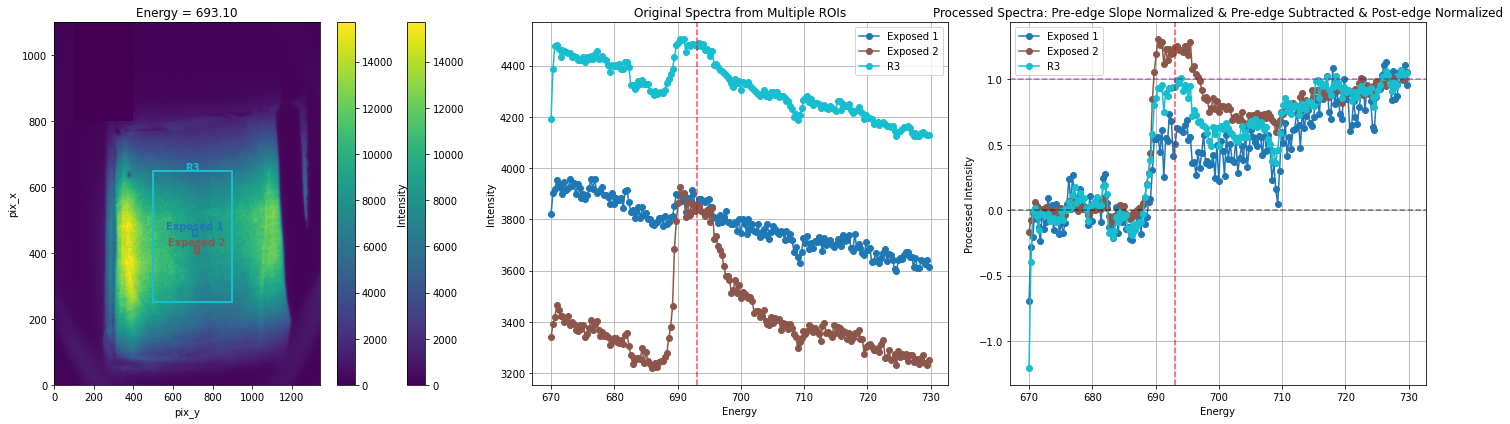

Data saved to A3S29_fluorine in CSV format


In [26]:
spectra_carbon_dict = A3S29_F1.extract_and_process_multiple_spectra(roi_list, roi_labels, plot=True, 
    pre_edge_norm_range=(672, 685), pre_edge_sub_range=(672, 685),
    post_edge_range=(725,730),energy_slice=693,save_data=True, save_path='A3S29_fluorine')